In [1]:
import numpy as np
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt

import nelpy as nel  # recommended import for nelpy
import nelpy.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpy import EpochArray, AnalogSignalArray, SpikeTrainArray, BinnedSpikeTrainArray

In [2]:
nel

<module 'nelpy' from '/home/shayok/Documents/Code/nelpy/nelpy/__init__.py'>

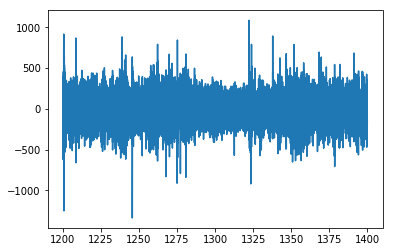

In [3]:
myFile = np.load('/home/shayok/Downloads/LFP.npz')
lfp = myFile['dataT2C1']*0.195
onlineRippleDetect = myFile['onlineRippleDetect']
offlineRippleDetect = myFile['offlineRippleDetections']
timeStampsSeconds = myFile['timeStampsSeconds']
timeStamps = myFile['timeStamps']
plt.plot(timeStampsSeconds,lfp)
plt.show()

# Basic AnalogSignalArray Functionality

In [4]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]],fs=1)
my_lfp = AnalogSignalArray([lfp],tdata=timeStamps,fs=30000,step=10)
print("Mean")
print(my_lfp.mean())
print(np.mean(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("min")
print(my_lfp.min())
print(np.amin(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("max")
print(my_lfp.max())
print(np.amax(np.transpose([lfp,onlineRippleDetect]),axis=0))

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1157: UserWarning: support created with given tdata and sampling rate, fs!


Mean
-0.1089335
[-0.1089335   0.63333333]
Standard Deviation
135.264969471
[ 135.26496947   56.26957931]
min
-1338.87
[-1338.87     0.  ]
max
1087.905
[ 1087.905  5000.   ]


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1231: UserWarning: ignoring signal outside of support


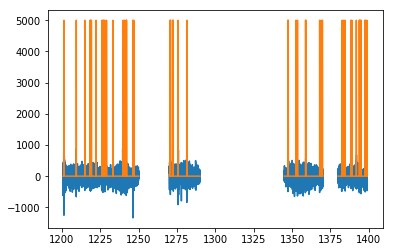

In [5]:
my_lfp = AnalogSignalArray([lfp,onlineRippleDetect],tdata=timeStamps,support=partialSupport,fs=30000,step=10)
npl.plot(my_lfp)

In [6]:
np.clip(np.transpose([lfp,onlineRippleDetect]),-1000,1000)

array([[-141.18 ,    0.   ],
       [-145.47 ,    0.   ],
       [-149.565,    0.   ],
       ..., 
       [-129.87 ,    0.   ],
       [-132.99 ,    0.   ],
       [-138.45 ,    0.   ]])

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1231: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1231: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1231: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1231: UserWarning: ignoring signal outside of support


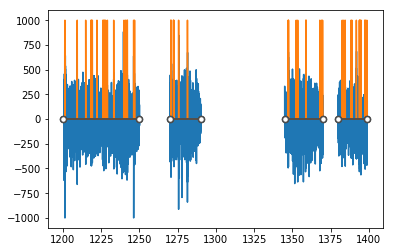

In [7]:
clipped_lfp = my_lfp.clip(-1000,1000)
npl.plot(clipped_lfp)
means = [snippet.mean() for snippet in clipped_lfp]
npl.plot(clipped_lfp.support, means)

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:575: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:575: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1231: UserWarning: ignoring signal outside of support


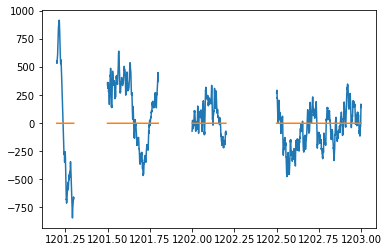

In [26]:
partialSupportForEtienne = EpochArray([[1200,1200.5], [1201.2,1201.3], [1201.5,1201.8],
                                       [1202,1202.2], [1202.5,1203]],fs=1)
mySuperRestrictedLFP = clipped_lfp[partialSupportForEtienne]
npl.plot(mySuperRestrictedLFP)

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1231: UserWarning: ignoring signal outside of support


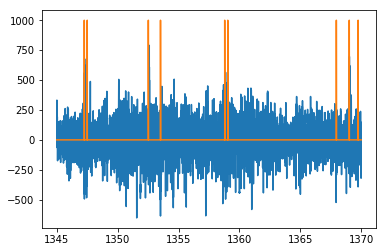

In [24]:
mynewlfp = clipped_lfp[2]
npl.plot(mynewlfp)

# Random

In [9]:
cow = np.array([[1,3,3],[3,1,3],[3,1,3],[3,1,2]])
cow.shape

(4, 3)

In [10]:
cow[:,[0,1]]

array([[1, 3],
       [3, 1],
       [3, 1],
       [3, 1]])

In [11]:
cmoo = "%s cows %s moos" %(4,56)
print(cmoo)

4 cows 56 moos


In [12]:
moo = np.squeeze(cow)
moo.shape

(4, 3)

In [13]:
try:
    if(timeStamps.shape[1]==cow.shape[1]):
        print("moo")
except:
    print("heyy")

heyy


# Interpolation

In [14]:
print(timeStamps[0])
print(timeStamps[1])

36019940
36019950


In [15]:
cow1 = []
cow1.append("moo")

In [16]:
interpObj = interpolate.interp1d(timeStampsSeconds, lfp)

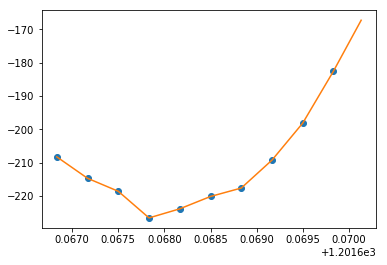

In [17]:
xnew = np.arange(timeStampsSeconds[5000],timeStampsSeconds[5010],1/30000)
ynew = interpObj(xnew)
plt.plot(timeStampsSeconds[5000:5010], lfp[5000:5010],'o',xnew,ynew,'-')
plt.show()

In [18]:
my_lfp = AnalogSignalArray([lfp],tdata=timeStamps,fs=30000,step=10)
my_lfp

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1157: UserWarning: support created with given tdata and sampling rate, fs!


base <AnalogSignalArray  at 0x7f5eec966860: 1 epoch> totalling 199.999666667 seconds

In [29]:
print(np.min(xnew),np.max(xnew))

1201.66683333 1201.67013333


In [20]:
print(timeStampsSeconds[1993])
print(my_lfp.time[3000])
print(my_lfp.time[4000])

1200.6645
1201.66466667
1201.998


(100,)
(1, 100)


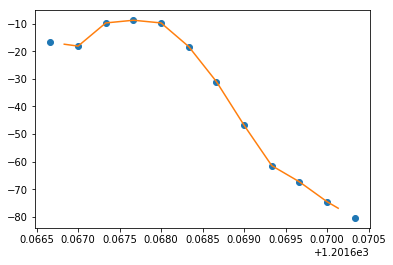

In [27]:
ytestnew = my_lfp.interp(xnew)
print(xnew.shape)
print((ytestnew).shape)
plt.plot(my_lfp.time[3006:3018], my_lfp.ydata[3006:3018],'o',xnew,np.squeeze(ytestnew),'-')
plt.show()